In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

About this dataset
**Age** : Age of the patient

**Sex** : Sex of the patient

**exang**: exercise induced angina (1 = yes; 0 = no)

**ca**: number of major vessels (0-3)

**cp** : Chest Pain type chest pain type

**Value 1**: typical angina

**Value 2**: atypical angina

**Value 3**: non-anginal pain

**Value 4**: asymptomatic

**trtbps** : resting blood pressure (in mm Hg)

**chol** : cholestoral in mg/dl fetched via BMI sensor

**fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg** : resting electrocardiographic results

**Value 0**: normal

**Value 1**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**Value 2**: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach** : maximum heart rate achieved

**target** : 0= less chance of heart attack 1= more chance of heart attack

n







# HEART ATTACK PREDICTION

In [ ]:
df = pd.read_csv("/content/heart_attack_prediction.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# EDA(EXPLORATORY DATA ANALYSIS)

**LETS CHECK THE DISTRIBUTION OF OUR DATA.**

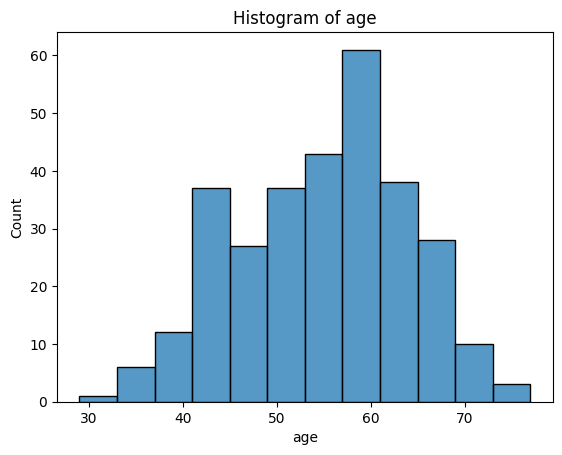

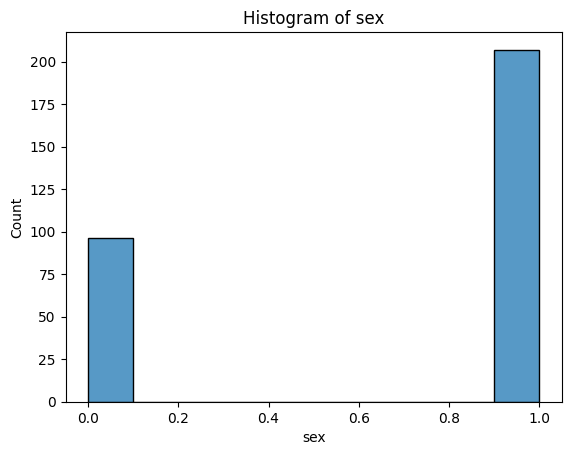

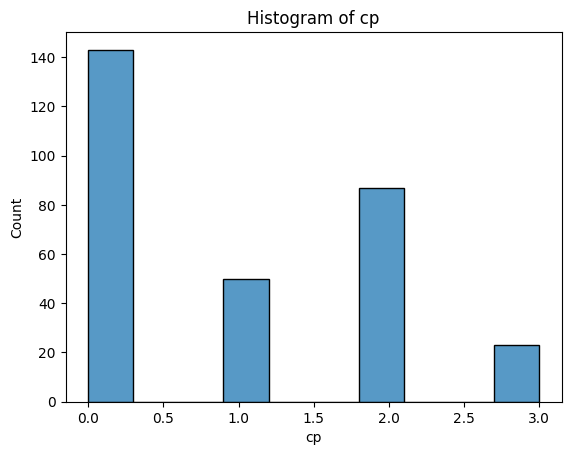

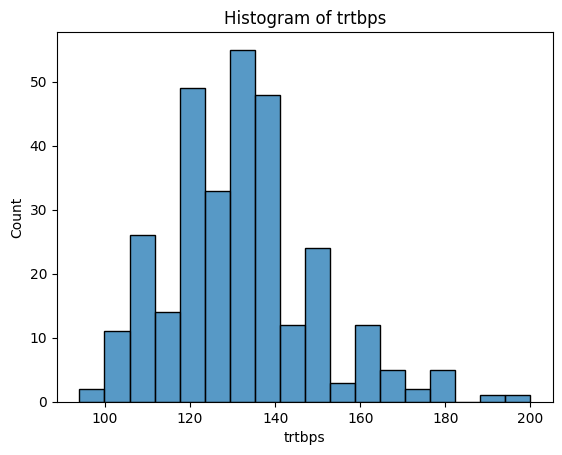

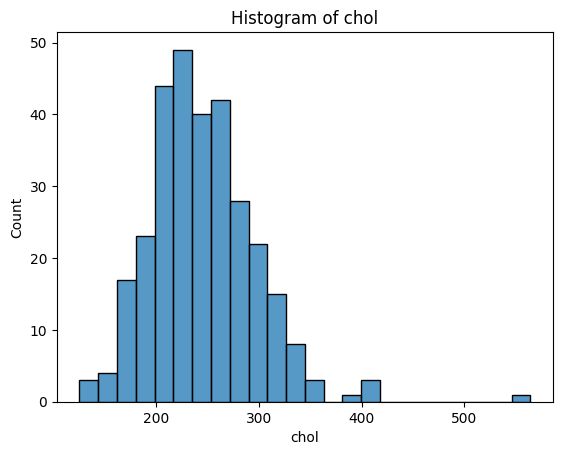

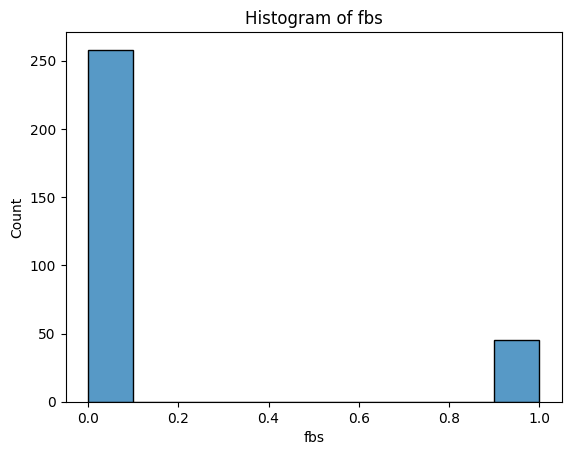

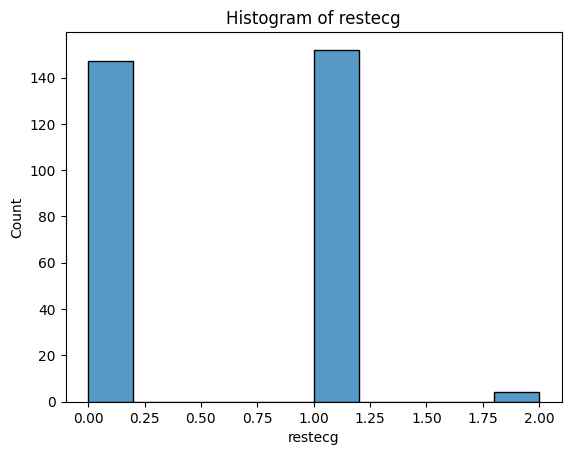

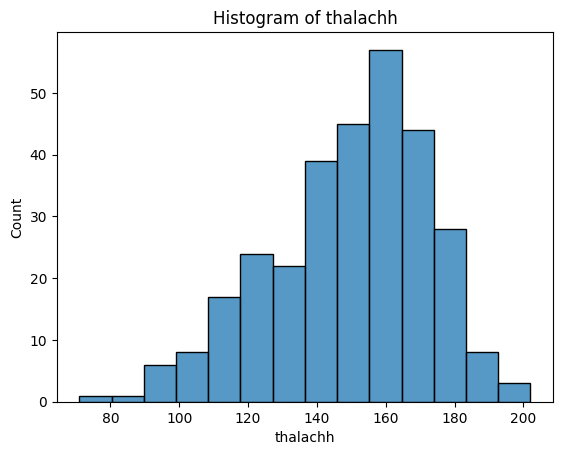

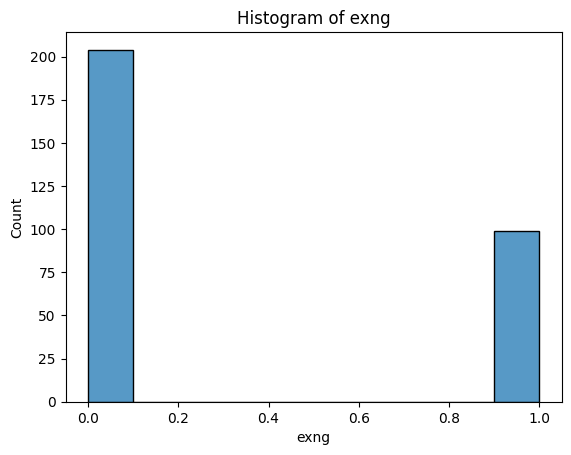

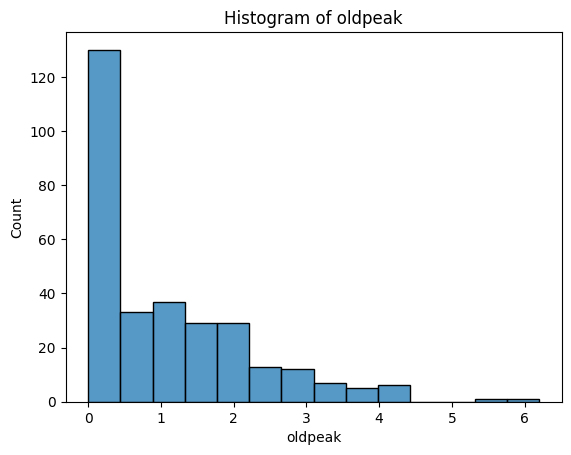

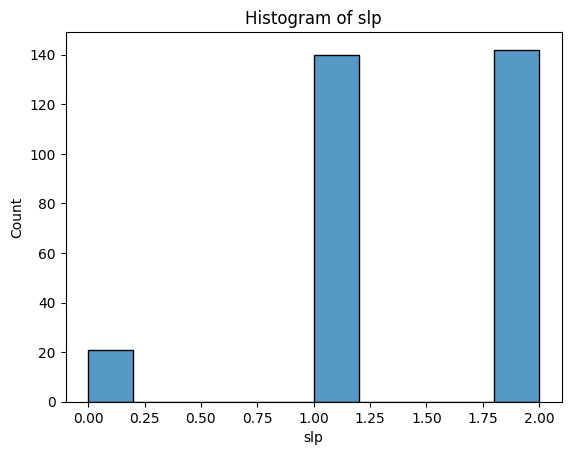

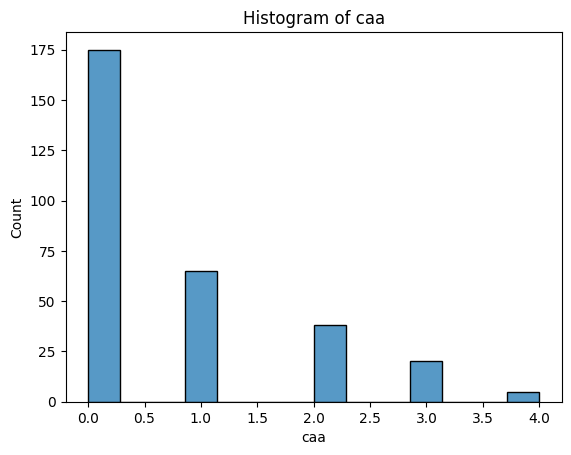

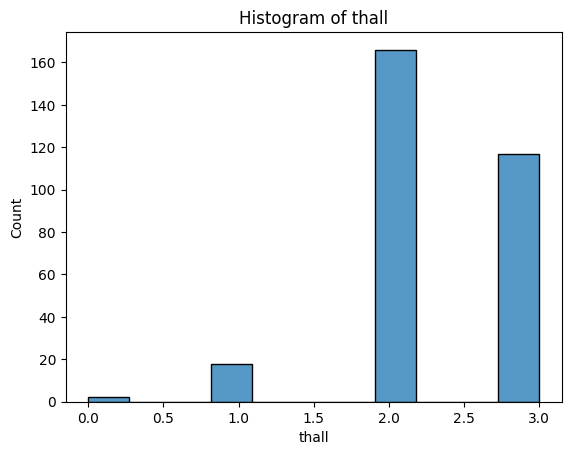

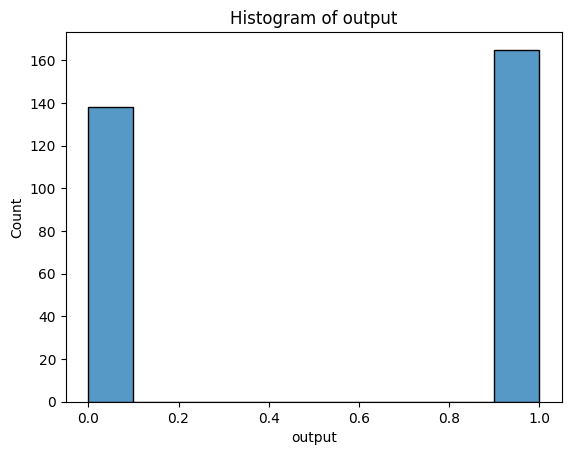

In [ ]:
for column in df.columns:
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.show()


<Axes: xlabel='output', ylabel='count'>

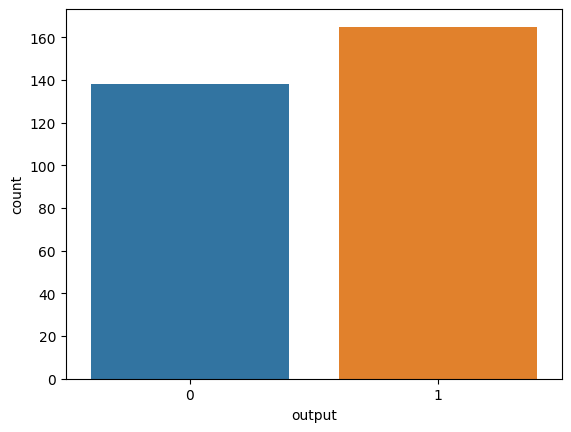

In [ ]:
sns.countplot(data=df, x='output')

<Axes: >

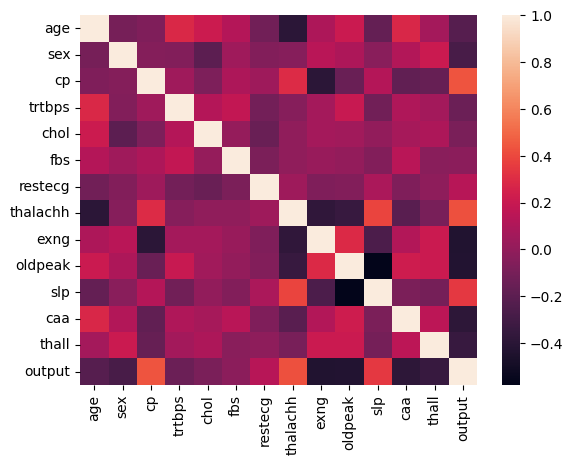

In [ ]:
sns.heatmap(df.corr())

# SCALING

**We will use standard scaling to scale this data.**

**We will use scikit learn library and standardscaler function.**

**It is recommended to train test split the data before scaling for some reasons like preventing data leakage and if you plan to do cross validation it is suggested you folloe this rule. In short it is used to preserve the robustness of the model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('output', axis=1), df['output'], test_size=0.15, random_state=2)


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

**We have scaled our data with the help of standard scaler, but when standard scaler helps us this function returns the transformed values in numpy array.**

In [ ]:
X_train_transformed

array([[-1.61959779,  0.68452277, -0.94958657, ..., -0.67961512,
        -0.71358833,  1.1376608 ],
       [-0.84776827,  0.68452277, -0.94958657, ...,  0.95273148,
        -0.71358833, -0.49574046],
       [-0.40672284,  0.68452277,  0.99498514, ..., -0.67961512,
        -0.71358833, -0.49574046],
       ...,
       [-2.83247275,  0.68452277,  0.02269928, ...,  0.95273148,
        -0.71358833, -0.49574046],
       [-0.5169842 , -1.46087177,  0.99498514, ..., -0.67961512,
        -0.71358833, -0.49574046],
       [ 0.91641348,  0.68452277, -0.94958657, ..., -0.67961512,
         0.29406112,  1.1376608 ]])

In [ ]:
# so lets convert this numpy array into dataframe again
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)
X_test_transformed  = pd.DataFrame(X_test_transformed, columns = X_test.columns)

**LETS SEE THE DIFFERENCE BETWEEN ORIGINAL AND SCALED DATA.**

In [ ]:
# original data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# The scaled  data
X_train_transformed.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02
mean,-1.278700e-16,-6.911894e-17,9.503855e-18,5.356718e-16,-1.995809e-16,1.382379e-17,-6.911894e-18,-1.589736e-16,7.603084e-17,-8.294273e-17,-1.244141e-16,-1.036784e-16,2.764758e-16
std,1.001951e+00,1.001951e+00,1.001951e+00,1.001951e+00,1.001951e+00,1.001951e+00,1.001951e+00,1.001951e+00,1.001951e+00,1.001951e+00,1.001951e+00,1.001951e+00,1.001951e+00
min,-2.832473e+00,-1.460872e+00,-9.495866e-01,-2.124546e+00,-2.340611e+00,-4.036037e-01,-9.995678e-01,-3.498439e+00,-6.845228e-01,-8.838065e-01,-2.311962e+00,-7.135883e-01,-3.762543e+00
25%,-7.375069e-01,-1.460872e+00,-9.495866e-01,-6.548063e-01,-6.916714e-01,-4.036037e-01,-9.995678e-01,-5.327232e-01,-6.845228e-01,-8.838065e-01,-6.796151e-01,-7.135883e-01,-4.957405e-01
50%,1.445840e-01,6.845228e-01,2.269928e-02,-8.952172e-02,-9.728611e-02,-4.036037e-01,8.893213e-01,8.697873e-02,-6.845228e-01,-3.714645e-01,-6.796151e-01,-7.135883e-01,-4.957405e-01
75%,6.958908e-01,6.845228e-01,9.949851e-01,4.757628e-01,4.970992e-01,-4.036037e-01,8.893213e-01,7.066806e-01,1.460872e+00,4.824387e-01,9.527315e-01,2.940611e-01,1.137661e+00
max,2.460073e+00,6.845228e-01,1.967271e+00,3.867470e+00,6.057478e+00,2.477678e+00,2.778210e+00,2.300200e+00,1.460872e+00,4.410394e+00,9.527315e-01,3.317009e+00,1.137661e+00


# MODEL BUILDING

# XGBOOST

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()

In [ ]:
model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import classification_report

report_xg = classification_report(y_test, y_pred, output_dict=True)
report_df_xg = pd.DataFrame(report_xg).transpose()
report_df_xg

,precision,recall,f1-score,support
0,0.952381,0.769231,0.851064,26.000000
1,0.760000,0.950000,0.844444,20.000000
accuracy,0.847826,0.847826,0.847826,0.847826
macro avg,0.856190,0.859615,0.847754,46.000000
weighted avg,0.868737,0.847826,0.848186,46.000000


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = xgb.XGBClassifier()
scores = cross_val_score(model, X_train_transformed,y_train, cv=10, scoring='accuracy')
scores

array([0.84615385, 0.76923077, 0.80769231, 0.73076923, 0.84615385,
       0.80769231, 0.73076923, 0.72      , 0.8       , 0.76      ])

In [ ]:
scores.mean()

0.7818461538461537

#  RANDOMFOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
rf_classifier.fit(X_train_transformed, y_train)


RandomForestClassifier()

In [ ]:
y_pred2 = rf_classifier.predict(X_test_transformed)

In [ ]:
report_rf = classification_report(y_test, y_pred2, output_dict=True)
report_df_rf = pd.DataFrame(report_rf).transpose()
report_df_rf

,precision,recall,f1-score,support
0,1.000000,0.730769,0.844444,26.000000
1,0.740741,1.000000,0.851064,20.000000
accuracy,0.847826,0.847826,0.847826,0.847826
macro avg,0.870370,0.865385,0.847754,46.000000
weighted avg,0.887279,0.847826,0.847322,46.000000


# K NEAREST NEIGHBORS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_classifier = KNeighborsClassifier()

In [ ]:
knn_classifier.fit(X_train_transformed, y_train)


KNeighborsClassifier()

In [ ]:
y_pred3 = knn_classifier.predict(X_test_transformed)

In [ ]:
report_knn = classification_report(y_test, y_pred3, output_dict=True)
report_df_knn = pd.DataFrame(report_knn).transpose()
report_df_knn

,precision,recall,f1-score,support
0,0.950000,0.730769,0.826087,26.000000
1,0.730769,0.950000,0.826087,20.000000
accuracy,0.826087,0.826087,0.826087,0.826087
macro avg,0.840385,0.840385,0.826087,46.000000
weighted avg,0.854682,0.826087,0.826087,46.000000


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train_transformed, y_train)


LogisticRegression()

In [ ]:
y_predlr = logreg.predict(X_test_transformed)

In [ ]:
report_lr = classification_report(y_test, y_predlr, output_dict=True)
report_df_lr = pd.DataFrame(report_lr).transpose()
report_df_lr

,precision,recall,f1-score,support
0,1.000000,0.807692,0.893617,26.000000
1,0.800000,1.000000,0.888889,20.000000
accuracy,0.891304,0.891304,0.891304,0.891304
macro avg,0.900000,0.903846,0.891253,46.000000
weighted avg,0.913043,0.891304,0.891561,46.000000


**NOW LETS SEE WHICH OF OUR MODEL PERFORMS BETTER.**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# For xgboost
confusion_matrix(y_test,y_pred)

array([[20,  6],
       [ 1, 19]])

In [ ]:
# For RandomForest
confusion_matrix(y_test,y_pred2)

array([[19,  7],
       [ 0, 20]])

In [ ]:
# For KNN
confusion_matrix(y_test,y_pred3)

array([[19,  7],
       [ 1, 19]])

In [ ]:
confusion_matrix(y_test,y_predlr)

array([[21,  5],
       [ 0, 20]])

As you can see count of **False Negatives**

XGB: 6

RG: 6

KNN: 7

LR: 5

as this is case of heart attack prediction so we can tolerate some false positives but not false negatives as it will lead to more uncontrolled attacks hence **Logistic Regression** performs the best for out Dataset.

Also logistic regression performed best in terms of Accuracy Score.






**THE MODELS CAN BE IMPROVE BY OUTLIER CAPPING AND HYPERPARAMETER TUNING.**

#**THANK YOU**